### Preprocess option data

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('Option2017_2_Clean.csv')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Unnamed:_0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open_Int,Delta,Gamma,Rho,Theta,Vega,Implied_volatility,currentDate,Underlaying_asset_price,Expiration_Date
0,0,17-Mar-17,22.5,ARR,Put,0.95,-0.35,0.65,1.25,1.0,9.0,-0.69794,0.28368,-0.00832,-0.00832,0.02372,0.27590,2/17/2017,21.709999,0.076660
1,1,21-Apr-17,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,659.0,0.45441,0.55431,0.01692,-0.00408,0.03730,0.10719,2/17/2017,21.709999,0.172485
2,2,21-Apr-17,20.0,ARR,Put,0.15,-0.05,0.05,0.20,3.0,251.0,-0.12236,0.11984,-0.00430,-0.00275,0.01999,0.25595,2/17/2017,21.709999,0.172485
3,3,21-Apr-17,22.0,ARR,Put,0.83,-0.02,0.65,1.00,1.0,166.0,-0.52709,0.26444,-0.01502,-0.00457,0.03551,0.21858,2/17/2017,21.709999,0.172485
4,4,21-Apr-17,23.0,ARR,Put,1.55,0.05,1.40,1.85,2.0,145.0,-0.68386,0.17777,-0.01760,-0.00590,0.03575,0.33344,2/17/2017,21.709999,0.172485


In [29]:
def plot_iv(ticker, plot_loc):
    stock = df[df.Ticker == ticker]
    
    k = np.linspace(stock['StrikePrice'].min(), stock['StrikePrice'].max(), len(np.unique(stock['StrikePrice'])))
    t = np.linspace(stock['Expiration_Date'].min(), stock['Expiration_Date'].max(),
                    len(np.unique(stock['Expiration_Date'])))
    k, t = np.meshgrid(k, t)
    implied_vol = griddata((stock['StrikePrice'],stock['Expiration_Date']),
                           stock['Implied_volatility'],(k,t),method='cubic')
    t_inx=~np.isnan(implied_vol)
    CM = (implied_vol - implied_vol[t_inx].mean()) / (implied_vol[t_inx].max())
    
    ax = fig_iv.add_subplot(plot_loc, projection='3d')
    surf = ax.plot_surface(k, t, implied_vol, rstride=1, cstride=1, facecolors=cm.coolwarm(CM),
                           edgecolor='r', lw=0.5, antialiased=False,alpha=0.8)
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Time to Maturity')
    ax.set_zlabel('Implied Volatility')
    ax.set_title(ticker + ' Implied Volatility 3D Plot', fontsize=18)
    ax.set_xlim([stock['StrikePrice'].min()-0.5,stock['StrikePrice'].max()+0.5])
    ax.set_ylim([stock['Expiration_Date'].min()-0.1,stock['Expiration_Date'].max()+0.1])
    ax.view_init(azim=30)
    norm=mpl.colors.Normalize(vmin=0,vmax=2.5)
    sm=plt.cm.ScalarMappable(cmap=cm.coolwarm,norm=norm)
    sm.set_array([])
    plt.colorbar(sm,ticks=np.linspace(0,2.5,14),boundaries=np.arange(-0.05,2.6,.1))

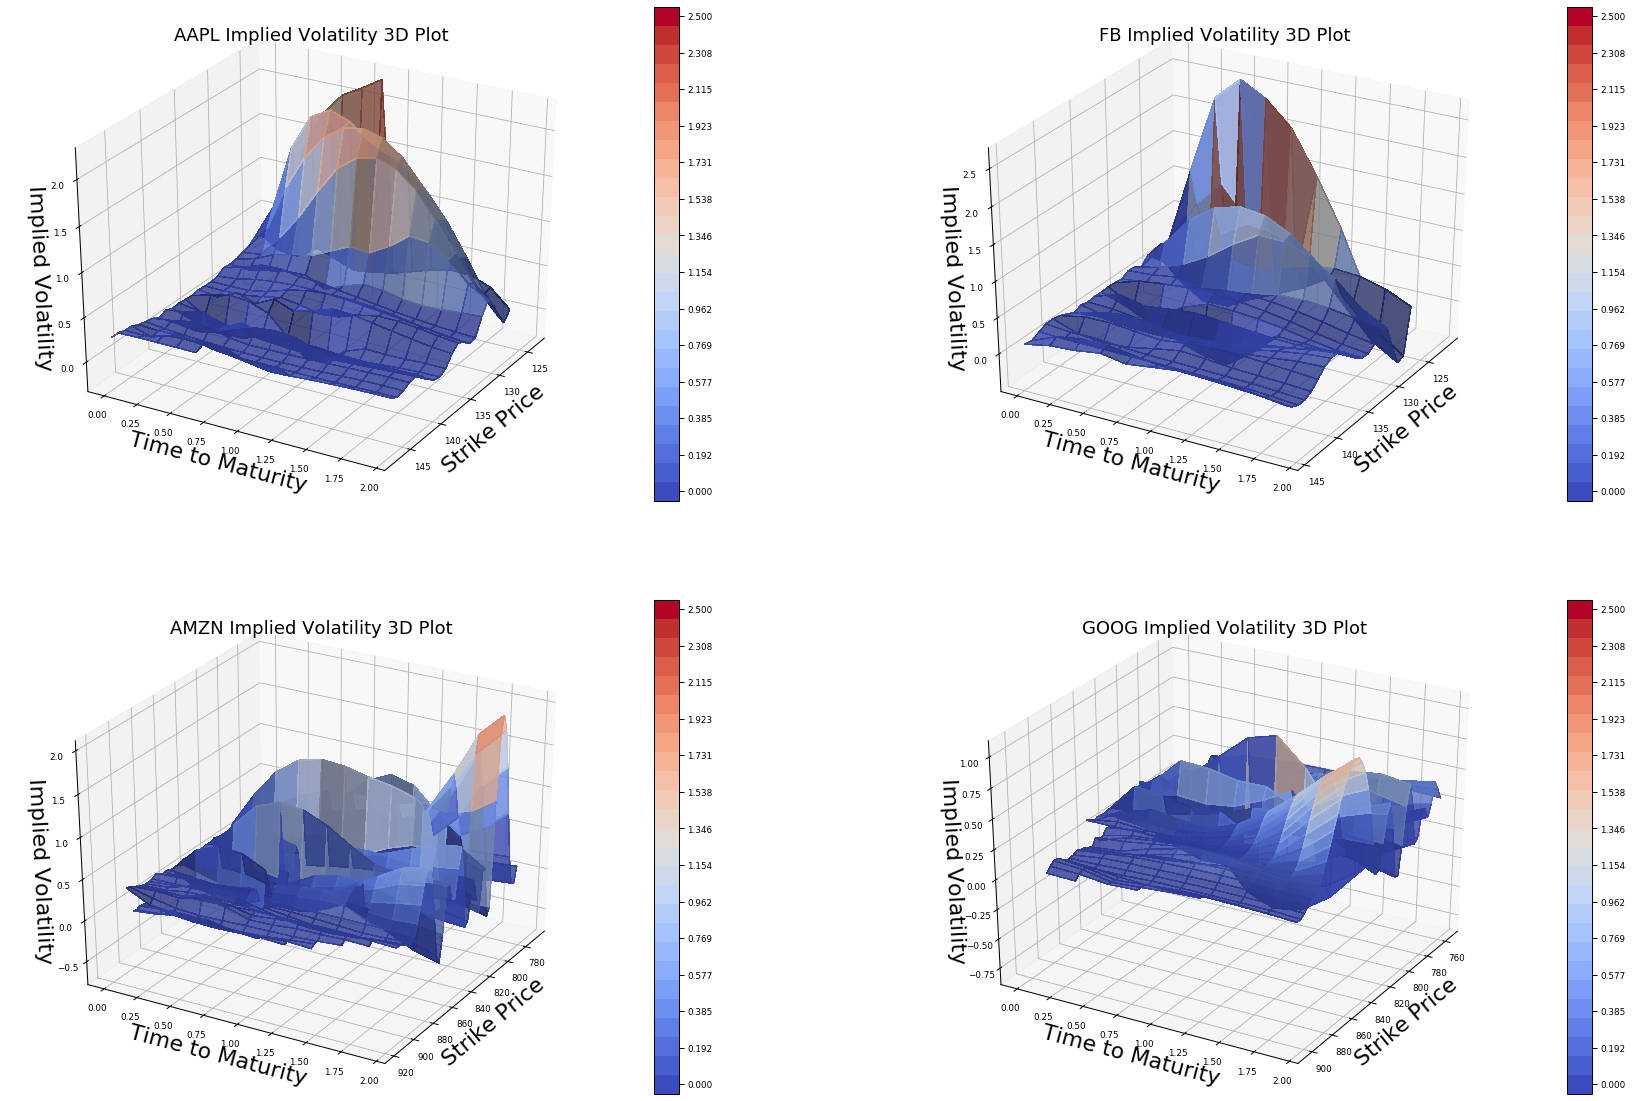

In [30]:
fig_iv = plt.figure(figsize=(30,20))

plot_iv('AAPL', 221)
plot_iv('FB', 222)
plot_iv('AMZN', 223)
plot_iv('GOOG', 224)
filename='IT_implied_volatility.tiff'
plt.savefig(filename,format='tiff',dpi=600)

plt.show()

In [44]:
col_names_pairplot = {'S/K' : 'Current divide Strike', 'Spread' : 'Spread', 
                      'Vega':'Vega', 'Implied_volatility':'IV'}

In [68]:
def plot_moneyness(ticker):
    stock = df[df.Ticker == ticker]
    stock['Spread'] = stock['Ask'] - stock['Bid']
    stock['S/K'] = stock['StrikePrice'] / stock['Underlaying_asset_price']

    sns_options_colors = ["#9b59b6", "#3498db"]

    sns_options_vars = ['S/K', 'Implied_volatility', 'Vega', 'Spread']

    sns.set_palette(sns.color_palette(sns_options_colors))

    sns.set_context("paper", rc={"axes.labelsize": 22})

    options_g = sns.pairplot(stock, vars=sns_options_vars, diag_kind='kde', 
                             hue='Type', markers=["o", "x"], 
                             plot_kws=dict(edgecolor='white', linewidth=.85, alpha=.85),
                             diag_kws=dict(shade=True), height=5)

    for i, j in zip(*np.triu_indices_from(options_g.axes, 1)):
        options_g.axes[i, j].set_visible(False)
        xlabels, ylabels = [], [] 

    for ax in options_g.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()

        xlabels.append(xlabel)

    for ax in options_g.axes[:,0]:

        ylabel = ax.yaxis.get_label_text()

        ylabels.append(ylabel)

    i,j=0,0

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            options_g.axes[j,i].xaxis.set_label_text(col_names_pairplot[xlabels[i]])
            options_g.axes[j,i].yaxis.set_label_text(col_names_pairplot[ylabels[j]])
    options_g.fig.suptitle(ticker, size=30, y=1.02)
    plt.savefig(ticker+'_moneyness.tiff',format='tiff',dpi=600)

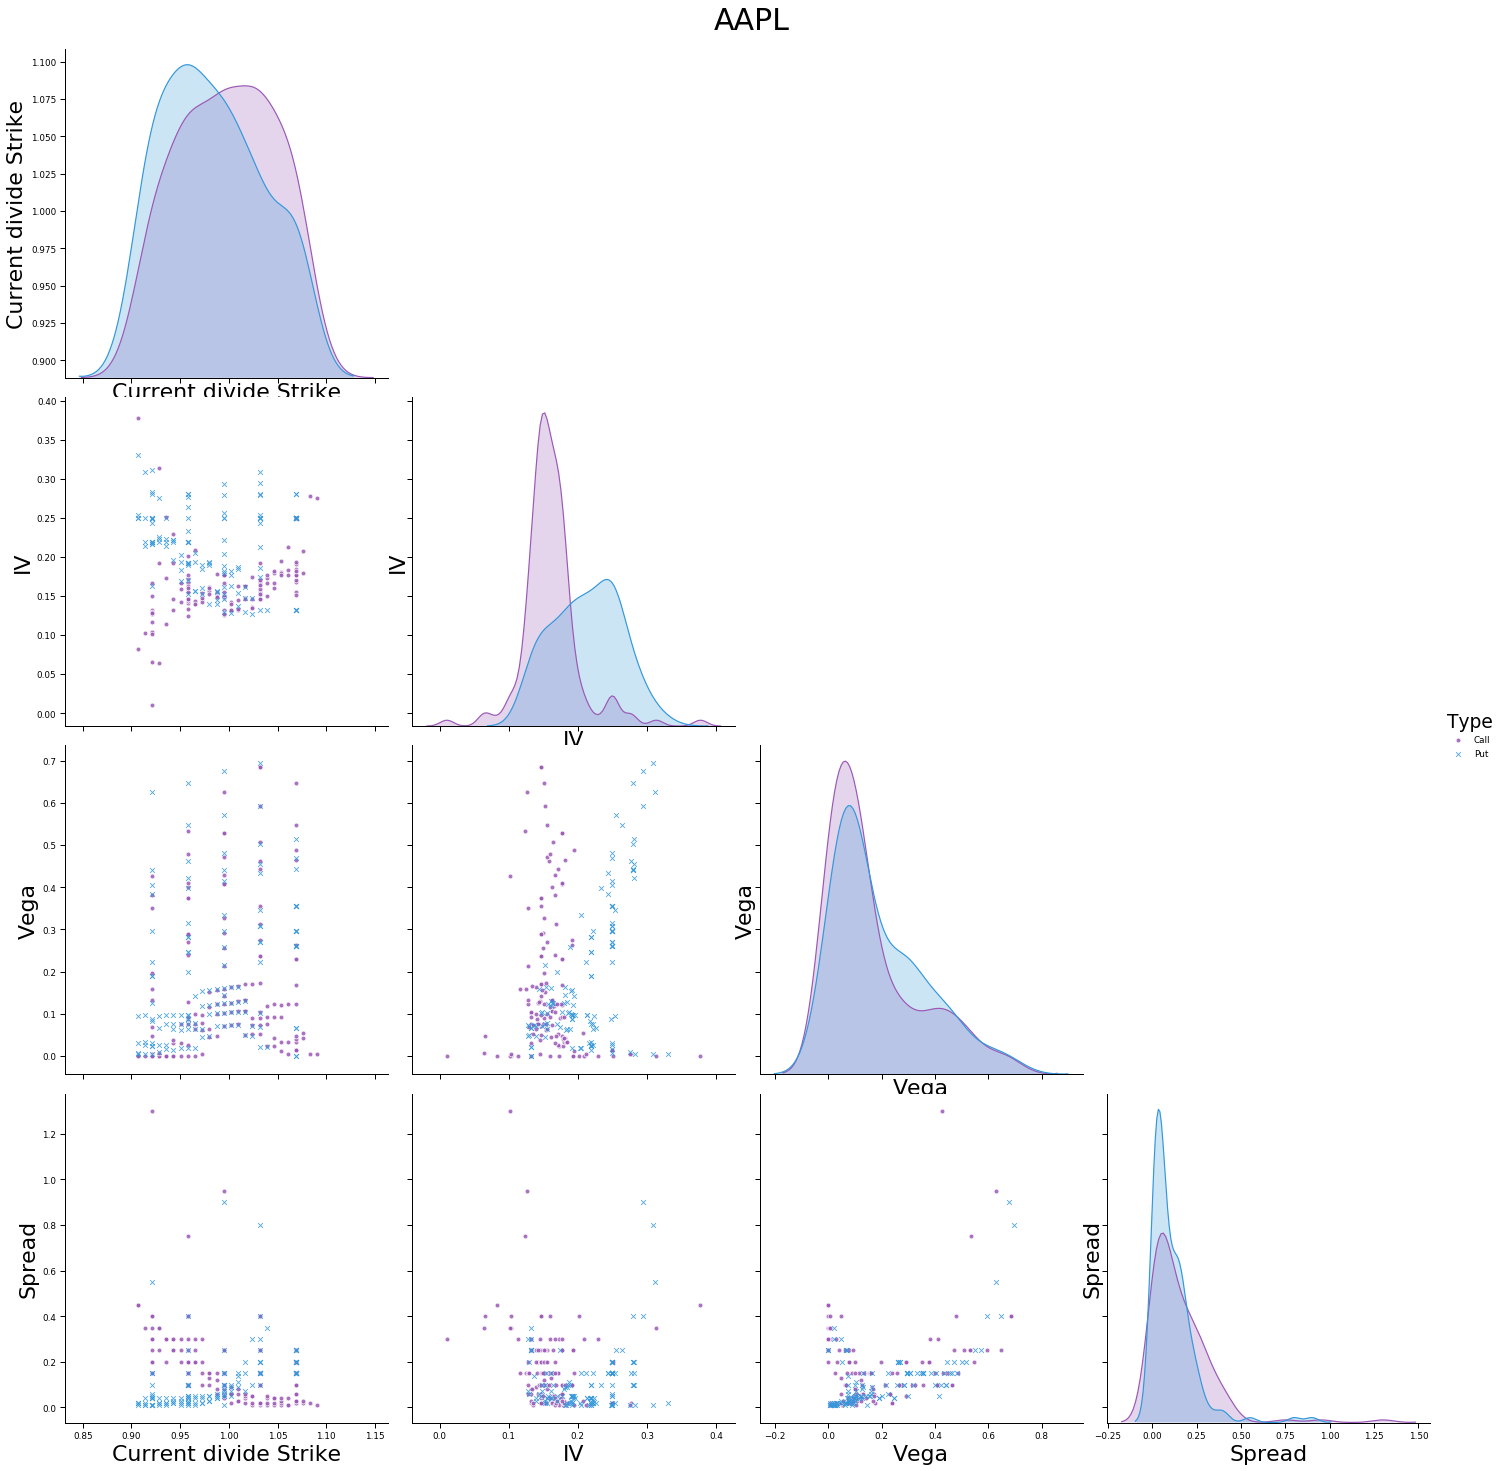

In [69]:
plot_moneyness('AAPL')

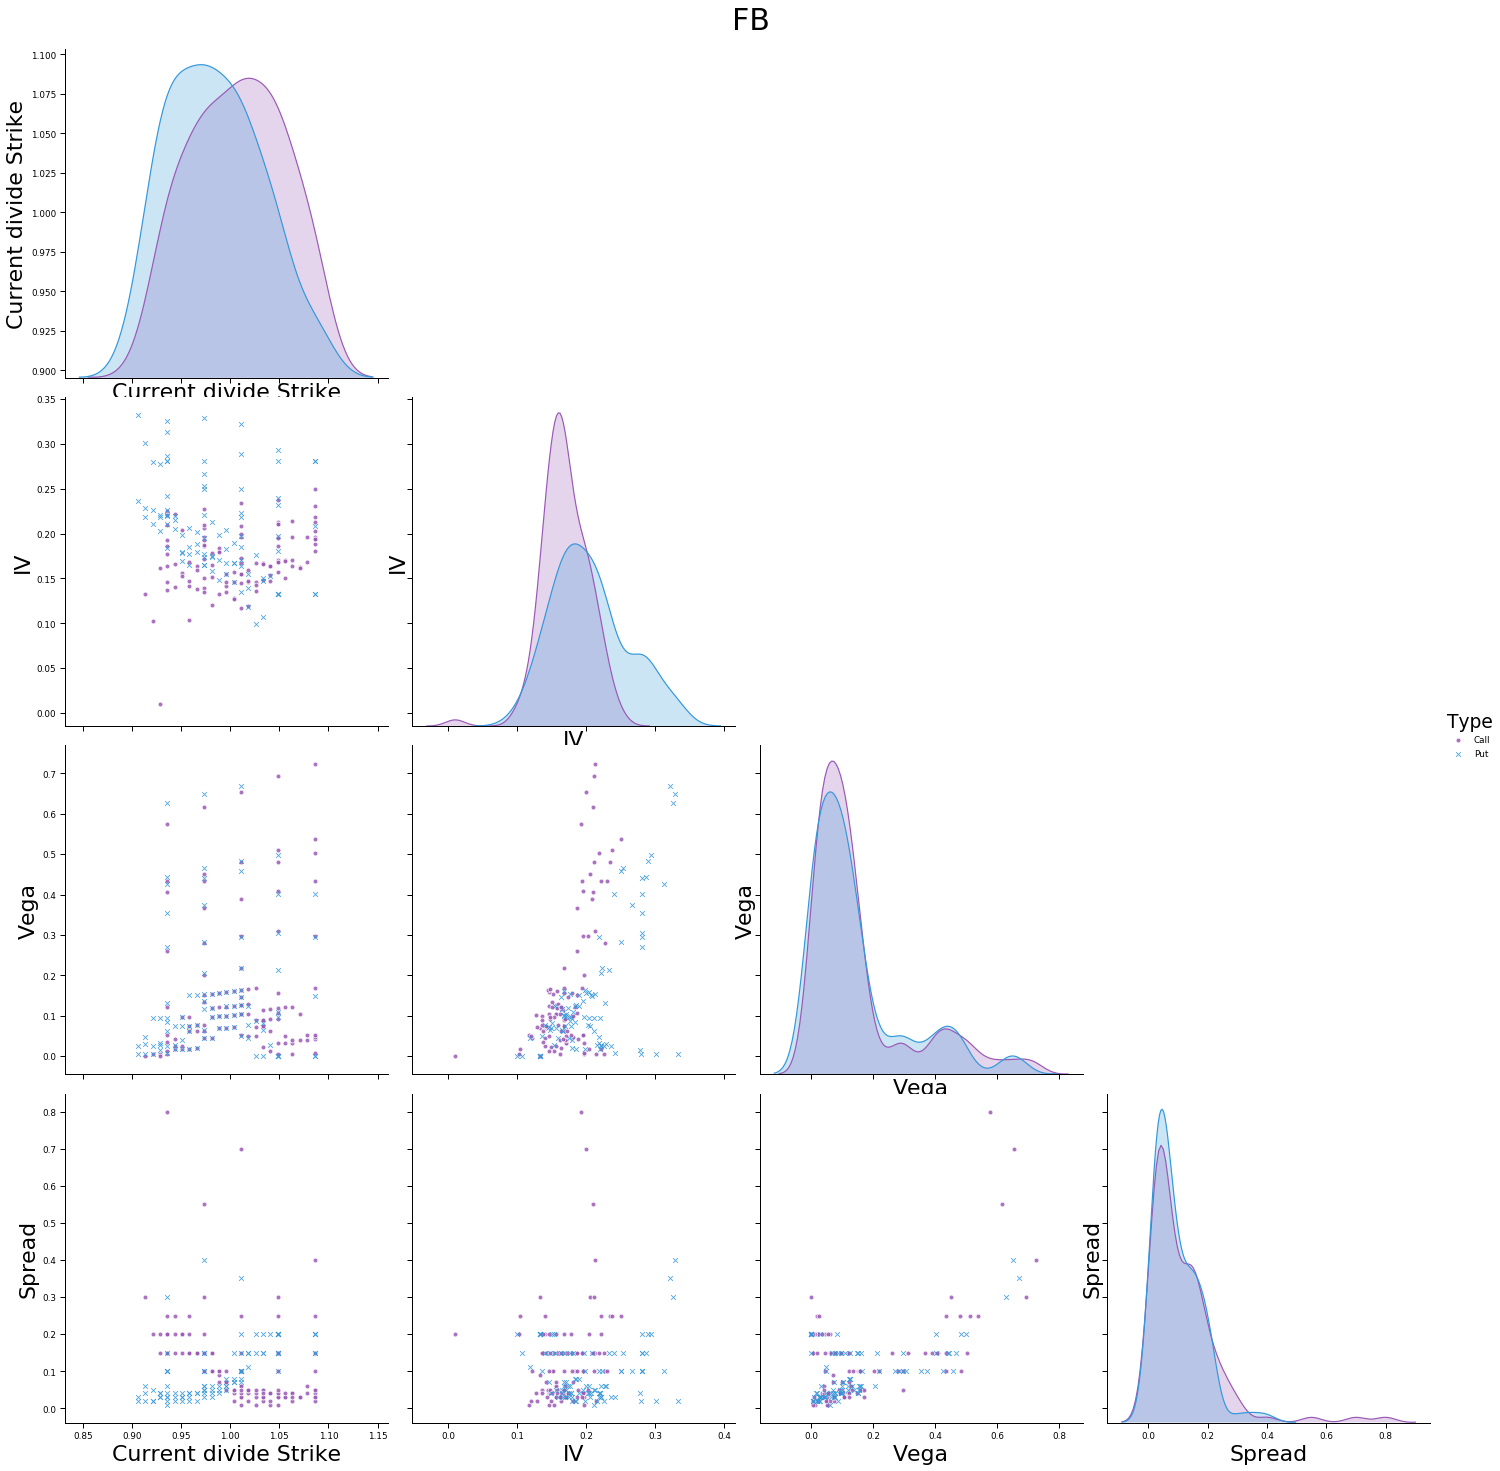

In [15]:
plot_moneyness('FB')

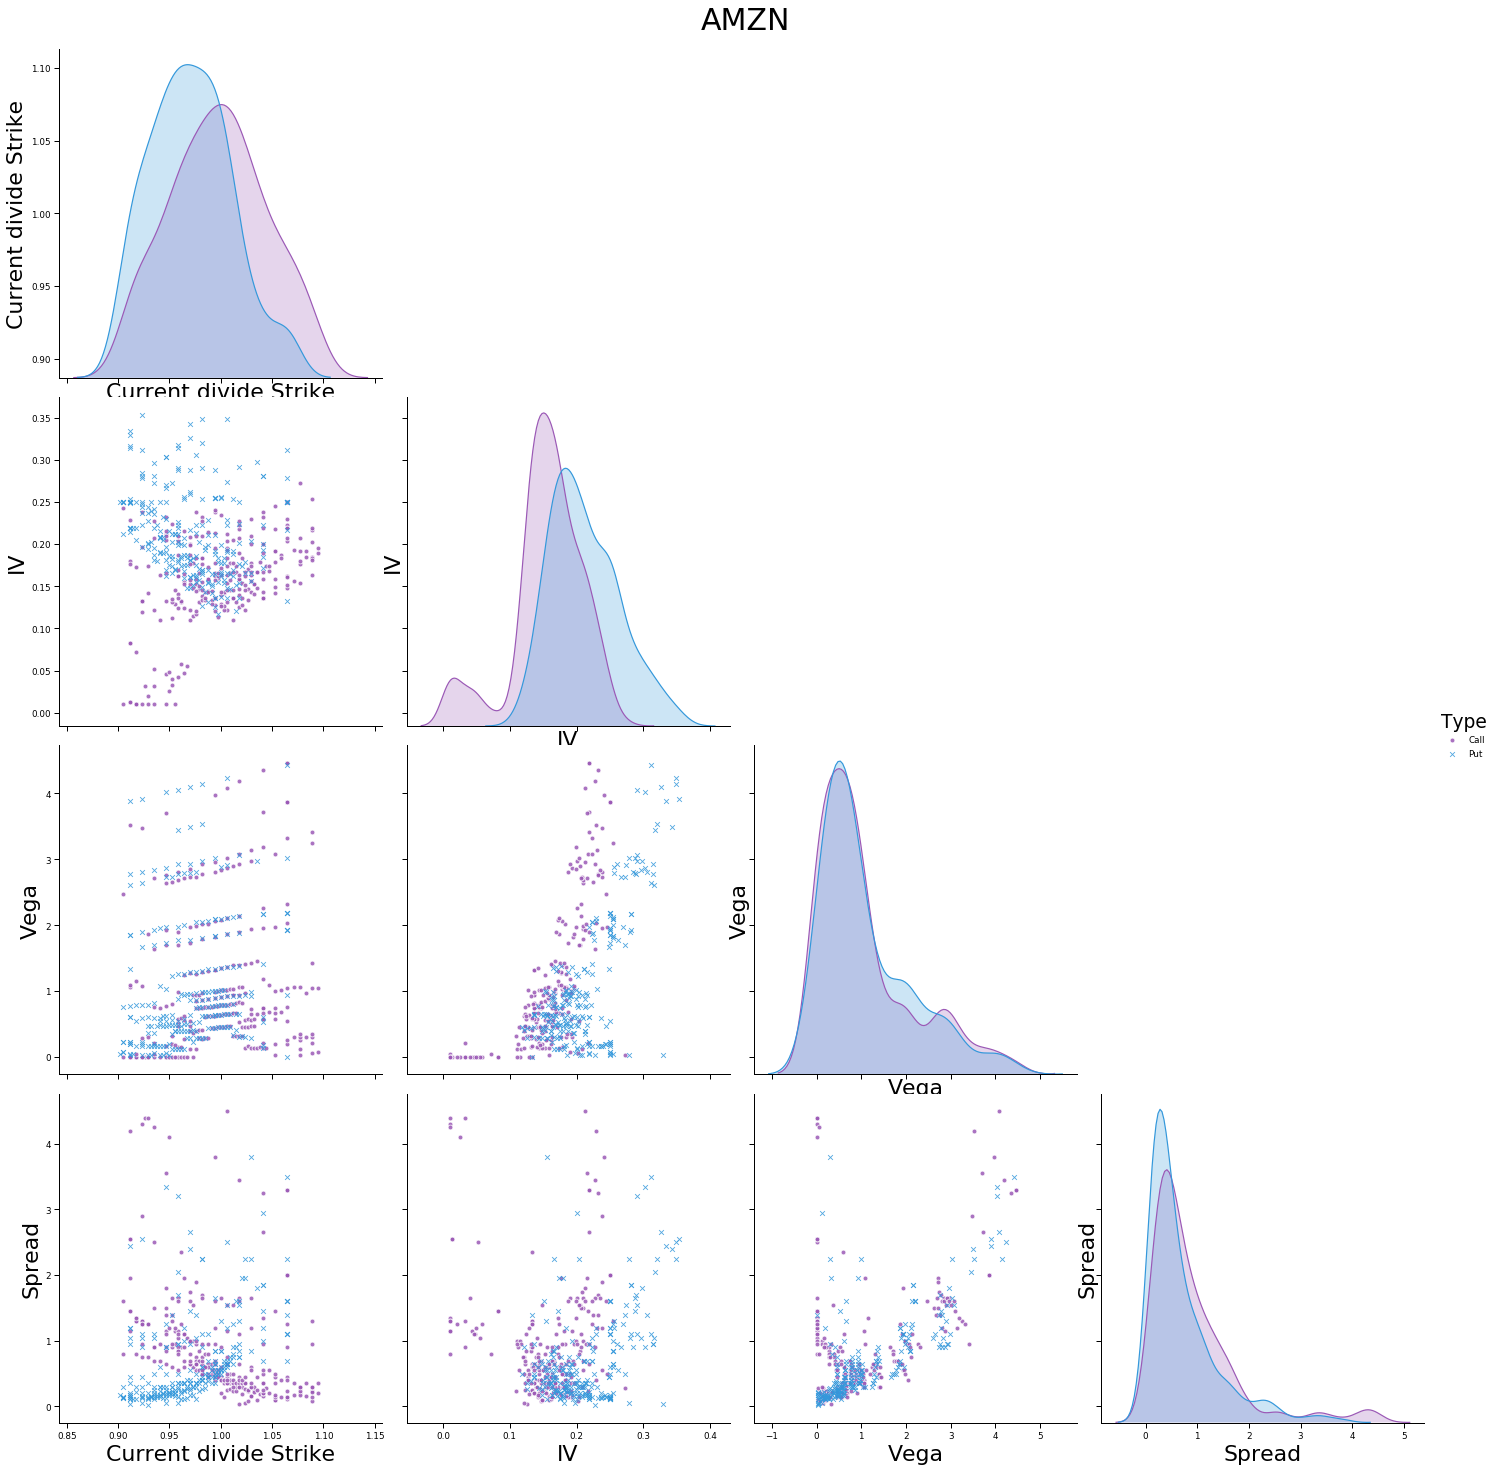

In [16]:
plot_moneyness('AMZN')

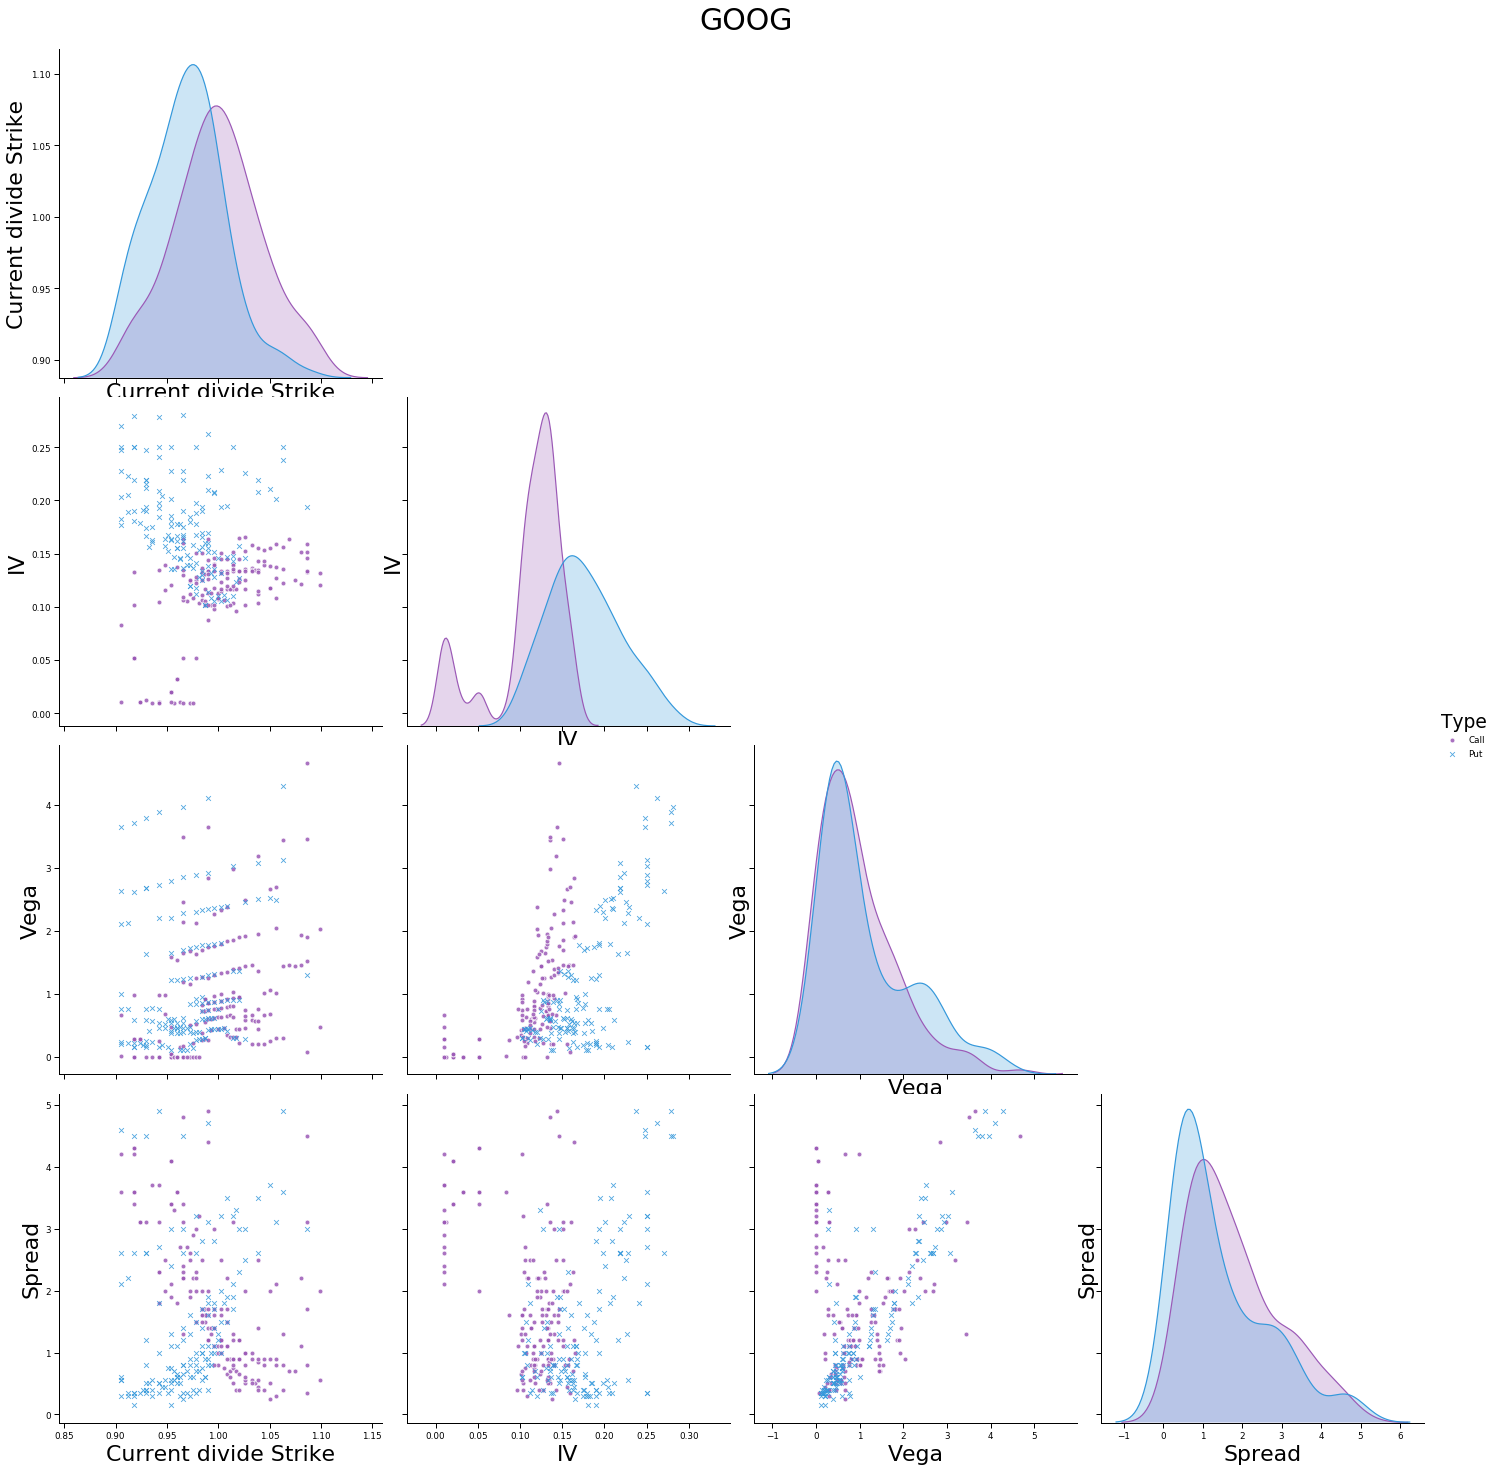

In [17]:
plot_moneyness('GOOG')

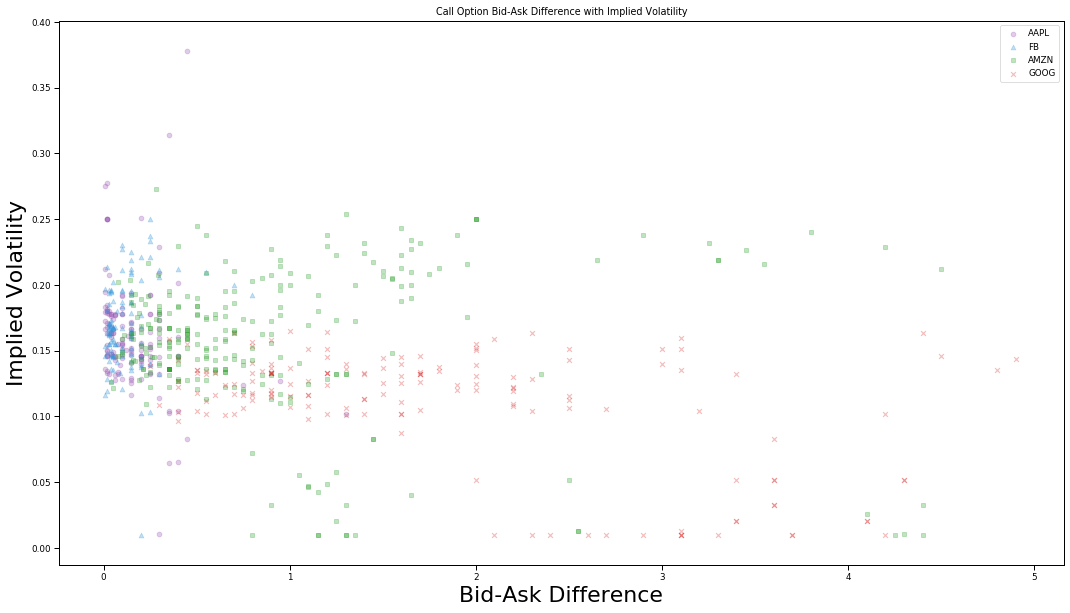

In [112]:
def call_bid_ask_plot():
    fig_bid_ask = plt.figure(figsize=(18,10))
    stock_list = ['AAPL', 'FB', 'AMZN', 'GOOG']
    j = 0
    marker_list = ['o','^', 's', 'x']
    color_list = ['#9b59b6', '#3498db', '#2ca02c', '#d62728']
    for i in stock_list:
        stock = df[df.Ticker == i]
        stock['Spread'] = stock['Ask'] - stock['Bid']
        plt.scatter(stock.Spread[stock.Type == 'Call'],stock.Implied_volatility
                    [stock.Type == 'Call'], c=color_list[j], 
                    alpha=0.3, label=i, marker=marker_list[j], )
        plt.xlabel('Bid-Ask Difference')
        plt.ylabel('Implied Volatility')
        plt.title('Call Option Bid-Ask Difference with Implied Volatility')
        j += 1
    plt.legend()
    plt.savefig('call_bid_ask_diff.tiff',format='tiff',dpi=600)


def put_bid_ask_plot():
    fig_bid_ask = plt.figure(figsize=(18,10))
    stock_list = ['AAPL', 'FB', 'AMZN', 'GOOG']
    j = 0
    marker_list = ['o','^', 's', 'x']
    color_list = ['#9b59b6', '#3498db', '#2ca02c', '#d62728']
    for i in stock_list:
        stock = df[df.Ticker == i]
        stock['Spread'] = stock['Ask'] - stock['Bid']
        plt.scatter(stock.Spread[stock.Type == 'Put'],stock.Implied_volatility
                    [stock.Type == 'Put'], c=color_list[j], 
                    alpha=0.3, label=i, marker=marker_list[j], )
        plt.xlabel('Bid-Ask Difference')
        plt.ylabel('Implied Volatility')
        plt.title('Put Option Bid-Ask Difference with Implied Volatility')
        j += 1
    plt.legend()
    plt.savefig('put_bid_ask_diff.tiff',format='tiff',dpi=600)
    

call_bid_ask_plot()

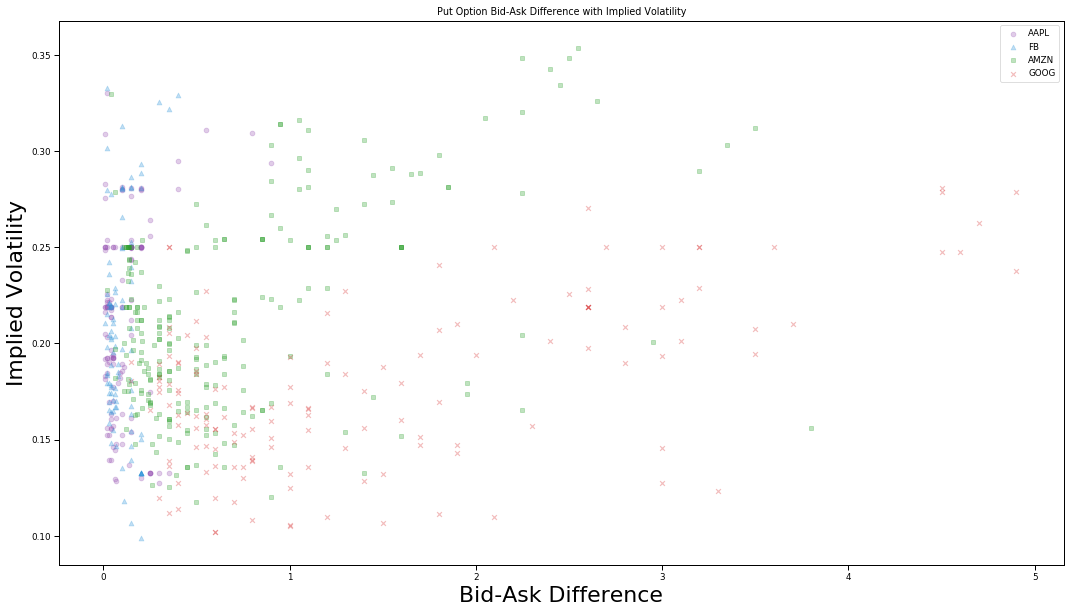

In [113]:
put_bid_ask_plot()

In [59]:
from sklearn.preprocessing import StandardScaler
stock_list=['AAPL', 'FB', 'AMZN', 'GOOG']
scaler = StandardScaler() 

def plot_entropy(option, compute, dataset):
    
    
    def compute_VCR(x):
        s = np.linalg.svd(x, compute_uv=False)
        rate = s[0]/np.sum(s)
        return rate
    
    
    def ComputeEntropy(x):
        s = np.linalg.svd(x, compute_uv=False)
        h = s/np.sum(s)
        entropy = -np.inner(h,np.log2(h))
        return entropy
    
    
    def compute_distribution(x):
        s = np.linalg.svd(x,compute_uv=False)
        ans = s/np.sum(s)
        return ans


    def relative_entropy(p,q):
        if not(p.shape == q.shape):
            print("\n Error: dimension must be aligned for two vectors\n")
            quit()
        p_over_q = np.zeros(len(p))
        with np.errstate(divide='ignore'):
            p_over_q = p/q
        t = np.log2(p_over_q)
        t[np.isnan(t)] = 0.0
        t[np.isinf(t)] = 0.0
        ans = np.inner(p,t)
        return ans
    
    
    if dataset == 'scaled':
        
        if compute == 'VCR':

            vcr = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                stock_scaled = scaler.fit_transform(stock_clean)
                vcr[ticker] = compute_VCR(stock_scaled)

            keys = list(vcr.keys())
            vals = list(vcr.values())
            if option == 'Put':
                plt.plot(keys, vals, '#9b59b6', lw=1.5, marker = 's', label=option)
            elif option == 'Call':
                plt.plot(keys, vals, '#3498db', lw=1.5, marker = 'o', label=option)
            plt.ylabel('Variance concentration ratio')
            plt.grid(True, alpha = 0.7, linestyle = ':', linewidth = 0.5, color = 'r')
            plt.gcf().autofmt_xdate()
            plt.title('Scaled Stock Variance Concentration Ratio')
            plt.legend()
            plt.subplots_adjust(top=0.92)

        elif compute == 'entropy':

            entropy = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                stock_scaled = scaler.fit_transform(stock_clean)
                entropy[ticker] = ComputeEntropy(stock_scaled)

            keys = list(entropy.keys())
            vals = list(entropy.values())
            if option == 'Put':
                plt.plot(keys, vals, '#9b59b6', lw=1.5, marker = 's', label=option)
            elif option == 'Call':
                plt.plot(keys, vals, '#3498db', lw=1.5, marker = 'o', label=option)
            plt.ylabel('Variance concentration ratio')
            plt.grid(True, alpha = 0.7, linestyle = ':', linewidth = 0.5, color = 'r')
            plt.gcf().autofmt_xdate()
            plt.title('Scaled Stock Entropy')
            plt.legend()
            plt.subplots_adjust(top=0.92)

        elif compute == 'relative_entropy':

            p_distribution = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                stock_scaled = scaler.fit_transform(stock_clean)
                p_distribution[ticker] = compute_distribution(stock_scaled)

            relative_matrix = np.zeros([len(p_distribution),len(p_distribution)])

            for i in range(len(stock_list)):
                for j in range(len(stock_list)):
                    relative_matrix[i,j] = relative_entropy(p_distribution[stock_list[i]], p_distribution[stock_list[j]])

            relative_entropy_df = pd.DataFrame(data=relative_matrix, index= stock_list, columns= stock_list)

            for stock in stock_list:
                ax = sns.heatmap(cbar=False, annot=True, data=relative_entropy_df, cmap = 'YlGnBu')
                bottom, top = ax.get_ylim()
                ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title('Scaled Relative Entropy of ' + option + ' Option')
            plt.tight_layout()
            
    elif dataset == 'raw':
        
        if compute == 'VCR':

            vcr = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                vcr[ticker] = compute_VCR(stock_clean)

            keys = list(vcr.keys())
            vals = list(vcr.values())
            if option == 'Put':
                plt.plot(keys, vals, '#9b59b6', lw=1.5, marker = 's', label=option)
            elif option == 'Call':
                plt.plot(keys, vals, '#3498db', lw=1.5, marker = 'o', label=option)
            plt.ylabel('Variance concentration ratio')
            plt.grid(True, alpha = 0.7, linestyle = ':', linewidth = 0.5, color = 'r')
            plt.gcf().autofmt_xdate()
            plt.legend()
            plt.title('Raw Stock Variance Concentration Ratio')
            plt.subplots_adjust(top=0.92)

        elif compute == 'entropy':

            entropy = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                entropy[ticker] = ComputeEntropy(stock_clean)

            keys = list(entropy.keys())
            vals = list(entropy.values())
            if option == 'Put':
                plt.plot(keys, vals, '#9b59b6', lw=1.5, marker = 's', label=option)
            elif option == 'Call':
                plt.plot(keys, vals, '#3498db', lw=1.5, marker = 'o', label=option)
            plt.ylabel('Variance concentration ratio')
            plt.grid(True, alpha = 0.7, linestyle = ':', linewidth = 0.5, color = 'r')
            plt.gcf().autofmt_xdate()
            plt.legend()
            plt.title('Raw Stock Entropy')
            plt.subplots_adjust(top=0.92)

        elif compute == 'relative_entropy':

            p_distribution = {}
            for ticker in stock_list:
                stock = df[df.Ticker == ticker]
                stock.index = stock.Type
                stock_clean = stock.loc[[option],['StrikePrice', 'Last', 'Chg', 'Bid', 'Ask', 'Vol', 'Open_Int', 'Delta', 'Gamma',
                                  'Rho', 'Theta', 'Vega', 'Implied_volatility', 'Underlaying_asset_price', 'Expiration_Date']]
                p_distribution[ticker] = compute_distribution(stock_clean)

            relative_matrix = np.zeros([len(p_distribution),len(p_distribution)])

            for i in range(len(stock_list)):
                for j in range(len(stock_list)):
                    relative_matrix[i,j] = relative_entropy(p_distribution[stock_list[i]], p_distribution[stock_list[j]])

            relative_entropy_df = pd.DataFrame(data=relative_matrix, index= stock_list, columns= stock_list)

            for stock in stock_list:
                ax = sns.heatmap(cbar=False, annot=True, data=relative_entropy_df, cmap = 'YlGnBu')
                bottom, top = ax.get_ylim()
                ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.title('Raw Relative Entropy of ' + option + ' Option')
            plt.tight_layout()


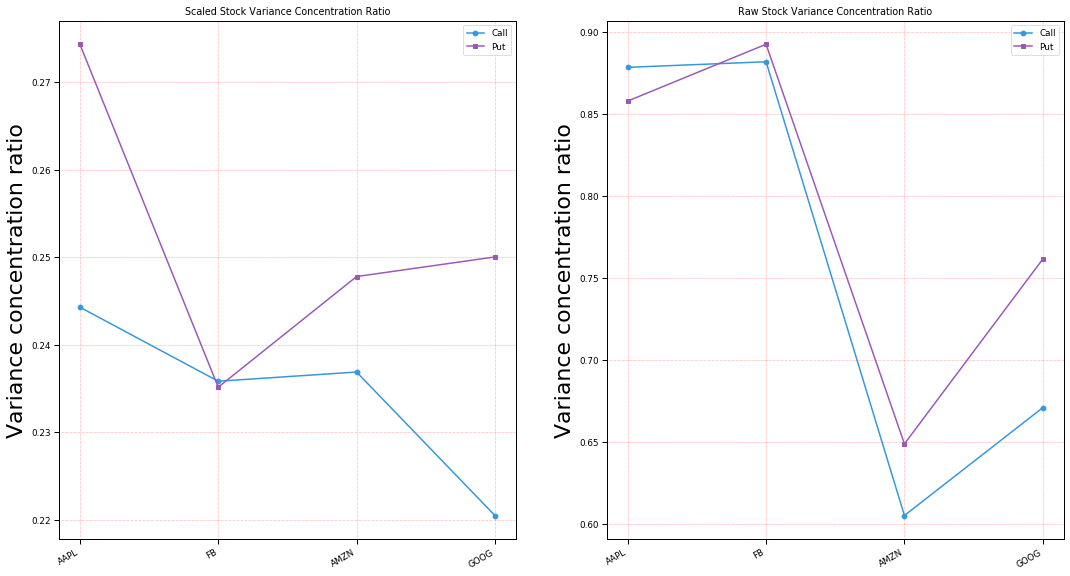

In [60]:
fig_vcr = plt.figure(figsize=(18,10))
fig_vcr.add_subplot(121)
plot_entropy('Call', 'VCR', 'scaled')
plot_entropy('Put', 'VCR', 'scaled')
fig_vcr.add_subplot(122)
plot_entropy('Call', 'VCR', 'raw')
plot_entropy('Put', 'VCR', 'raw')
plt.savefig('Stock_VCR.tiff',format='tiff',dpi=600)

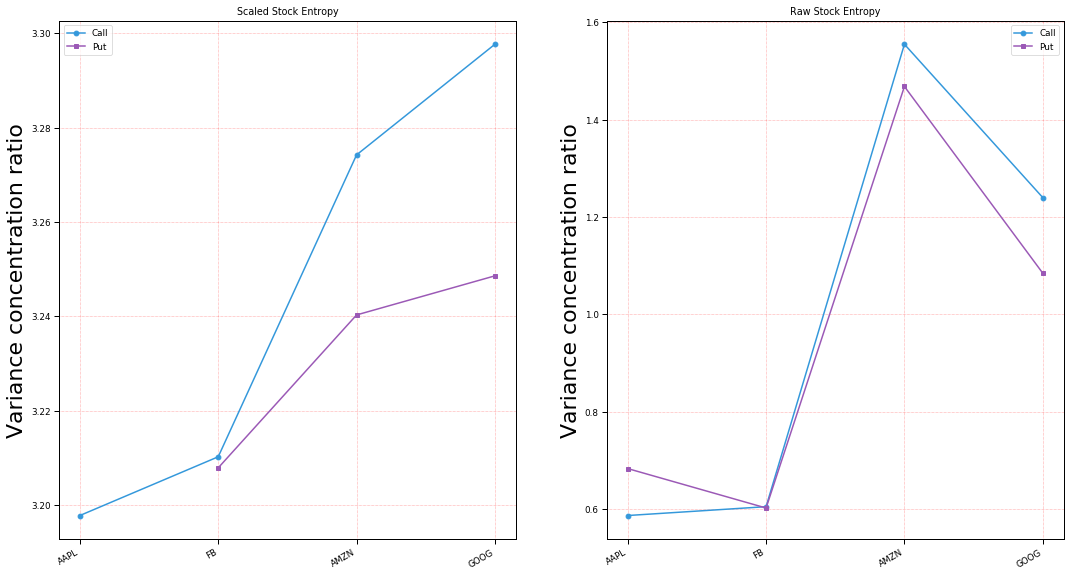

In [61]:
fig_entro = plt.figure(figsize=(18,10))
fig_entro.add_subplot(121)
plot_entropy('Call', 'entropy', 'scaled')
plot_entropy('Put', 'entropy', 'scaled')
fig_entro.add_subplot(122)
plot_entropy('Call', 'entropy', 'raw')
plot_entropy('Put', 'entropy', 'raw')
plt.savefig('Stock_Entropy.tiff',format='tiff',dpi=600)

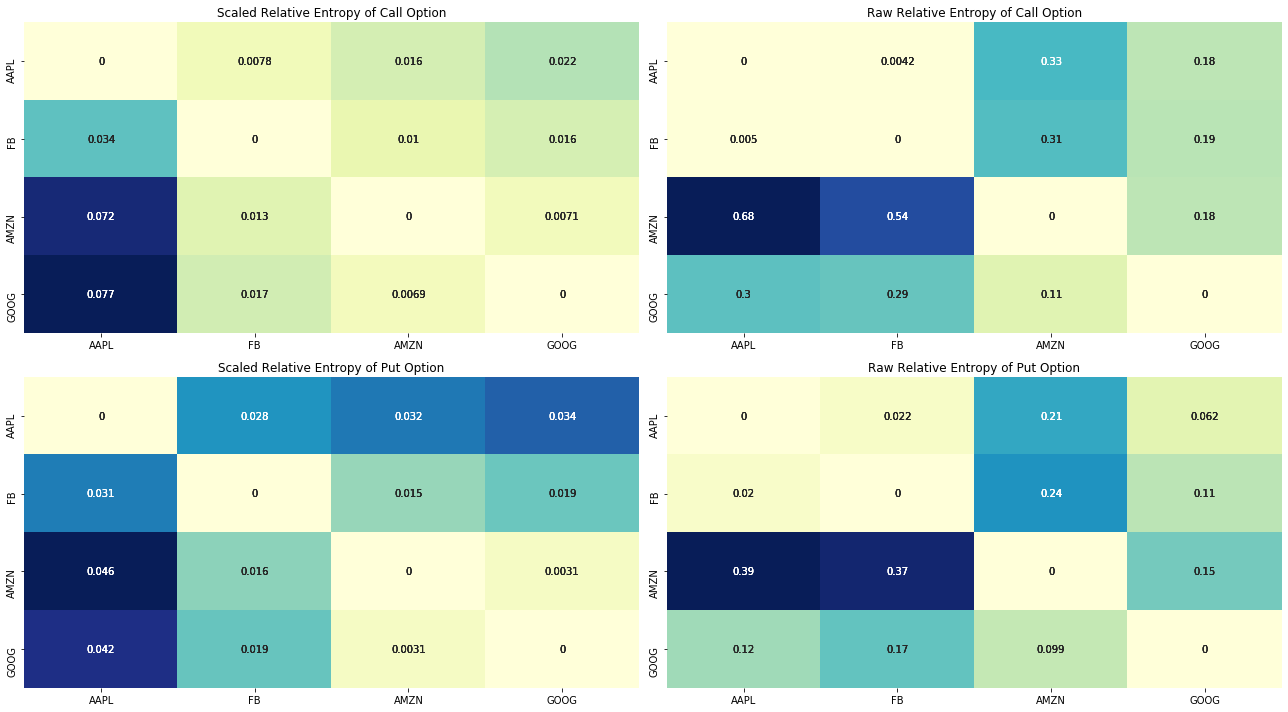

In [155]:
fig_relative_entropy = plt.figure(figsize=(18,10))
ax = fig_relative_entropy.add_subplot(221)
plot_entropy('Call', 'relative_entropy', 'scaled')
ax = fig_relative_entropy.add_subplot(222)
plot_entropy('Call', 'relative_entropy', 'raw')
ax = fig_relative_entropy.add_subplot(223)
plot_entropy('Put', 'relative_entropy', 'scaled')
ax = fig_relative_entropy.add_subplot(224)
plot_entropy('Put', 'relative_entropy', 'raw')
plt.savefig('Stock_Relative_Entropy.tiff',format='tiff',dpi=600)

### Analysis data
1. Analysis European Option data

In [226]:
from math import log, sqrt, exp, log2
from scipy import stats, optimize
from scipy.stats import norm

In [227]:
df_european = df.copy()
s = df_european.Underlaying_asset_price
k = df_european.StrikePrice
t = df_european.Expiration_Date
r = 0.03
o_p = df_european.Last
true_iv = df_european.Implied_volatility

In [228]:
def bs_call_price(s, k, t, r, sigma):
    d1 = (log(s/k) + (r + 0.5 * sigma ** 2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    n_d1 = stats.norm.cdf(d1, 0.0, 1.0)
    n_d2 = stats.norm.cdf(d2, 0.0, 1.0)

    call_price = (s * n_d1 - k * exp(-r * t) * n_d2)

    return call_price

def bs_put_price(s, k, t, r, sigma):
    d1 = (log(s/k) + (r + 0.5 * sigma ** 2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    n_d1 = stats.norm.cdf(-d1, 0.0, 1.0)
    n_d2 = stats.norm.cdf(-d2, 0.0, 1.0)

    put_price = (k * exp(-r * t) * n_d2 - s * n_d1)

    return put_price

In [229]:
df_european['compute_iv'] = 0
ans = []
for i in range(len(df_european.index)):
    if df_european.Type[i] == 'Call':
        def f_brent_call(sigma):
            return bs_call_price(s[i], k[i], t[i], r, sigma) - o_p[i]
        root = optimize.brentq(f_brent_call, true_iv[i] - 2, true_iv[i] + 2)
        ans.append(root)

    else:
        def f_brent_put(sigma):
            return bs_put_price(s[i], k[i], t[i], r, sigma) - o_p[i]
        root = optimize.brentq(f_brent_put, true_iv[i] - 2, true_iv[i] + 2)
        ans.append(root)
        
df_european['compute_iv'] = ans

for i in range(len(df_european.index)):
    if abs(df_european.compute_iv[i] - df_european.Implied_volatility[i]) > 0.005:
        df_european.drop(i, inplace=True)
        
df_european = df_european.reset_index(drop=True)

In [230]:
df_european

,Unnamed:_0,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,...,Delta,Gamma,Rho,Theta,Vega,Implied_volatility,currentDate,Underlaying_asset_price,Expiration_Date,compute_iv
0,1,21-Apr-17,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,...,0.45441,0.55431,0.01692,-0.00408,0.03730,0.10719,2/17/2017,21.709999,0.172485,0.105710
1,9,16-Jun-17,12.5,RESI,Call,1.20,0.20,1.10,1.40,2.0,...,0.73514,0.18291,0.02763,-0.00418,0.02675,0.21658,2/17/2017,13.310000,0.325804,0.214675
2,45,15-Sep-17,12.5,CAFD,Call,1.60,0.07,1.40,1.75,1.0,...,0.75087,0.15047,0.04883,-0.00316,0.03436,0.24548,2/17/2017,13.400000,0.574949,0.242453
3,46,15-Sep-17,12.5,CAFD,Call,1.60,0.07,1.40,1.75,1.0,...,0.75087,0.15047,0.04883,-0.00316,0.03436,0.24548,2/17/2017,13.400000,0.574949,0.242453
4,47,15-Sep-17,12.5,CAFD,Call,1.60,0.07,1.40,1.75,1.0,...,0.72724,0.13717,0.04636,-0.00346,0.03504,0.24548,2/17/2017,13.400000,0.574949,0.242453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,7570,17-Mar-17,21.0,JBLU,Put,1.25,-0.35,1.15,1.30,30.0,...,-0.68588,0.22404,-0.00797,-0.01097,0.02186,0.32934,2/17/2017,20.110001,0.076660,0.333403
878,7574,16-Jun-17,21.0,JBLU,Call,1.00,0.03,1.05,1.20,19.0,...,0.47349,0.11077,0.02703,-0.00827,0.04579,0.28312,2/17/2017,20.110001,0.325804,0.282573
879,7575,16-Jun-17,22.0,JBLU,Call,0.75,0.09,0.75,0.85,100.0,...,0.36582,0.10784,0.02130,-0.00757,0.04800,0.30272,2/17/2017,20.110001,0.325804,0.301360
880,7578,16-Jun-17,21.0,JBLU,Put,1.95,-0.15,1.90,2.10,10.0,...,-0.53480,0.10798,-0.03026,-0.00606,0.04554,0.34058,2/17/2017,20.110001,0.325804,0.340577


In [120]:
df_european.to_csv('EuropeanOption2017.csv')

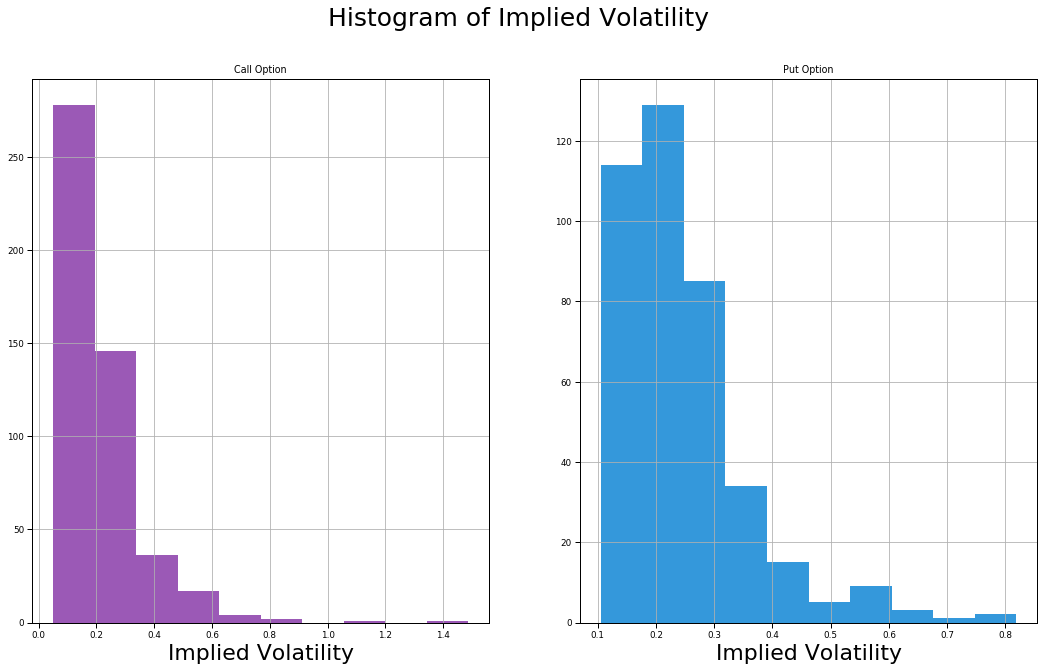

In [121]:
fig_eu_IV = plt.figure(figsize=(18,10))
plt.subplot(121)
ax = df_european.Implied_volatility[df_european.Type == 'Call'].hist(color='#9b59b6')
ax.set_xlabel('Implied Volatility')
ax.set_title('Call Option')
plt.subplot(122)
ax = df_european.Implied_volatility[df_european.Type == 'Put'].hist(color='#3498db')
ax.set_xlabel('Implied Volatility')
ax.set_title('Put Option')
fig_eu_IV.suptitle('Histogram of Implied Volatility', size=25)
plt.savefig('Implied_volatility_hist.tiff',format='tiff',dpi=600)
plt.show()

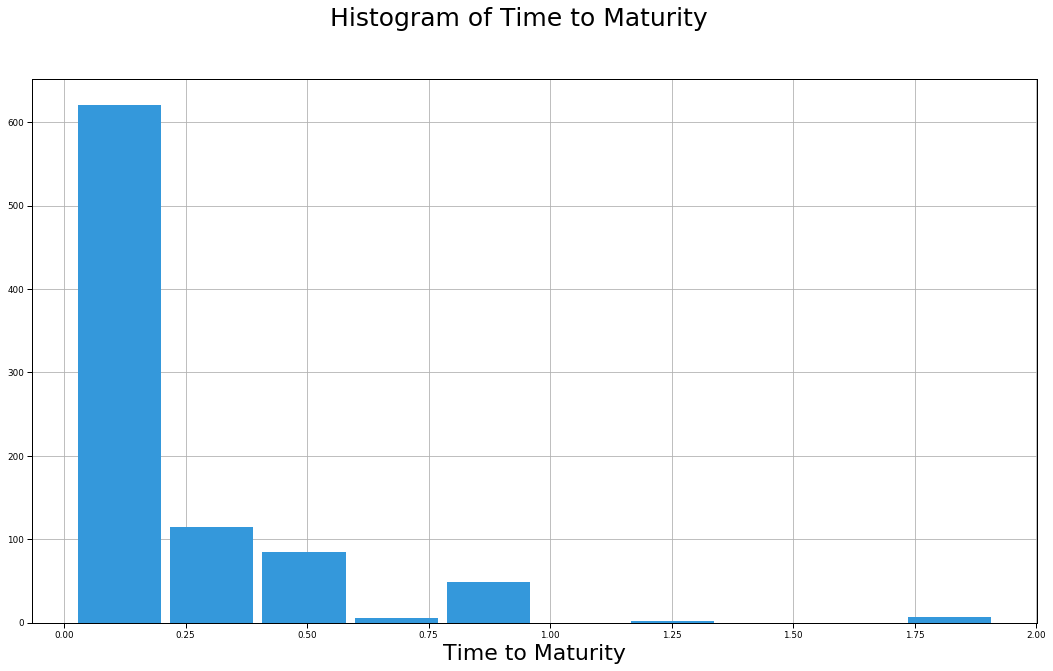

In [122]:
fig_time_matu = plt.figure(figsize=(18,10))
df_european.Expiration_Date.hist(color='#3498db', zorder=2, rwidth=0.9)
plt.suptitle('Histogram of Time to Maturity', size = 25)
plt.xlabel('Time to Maturity')
plt.savefig('Time_to_maturity_hist.tiff',format='tiff',dpi=600)
plt.show()

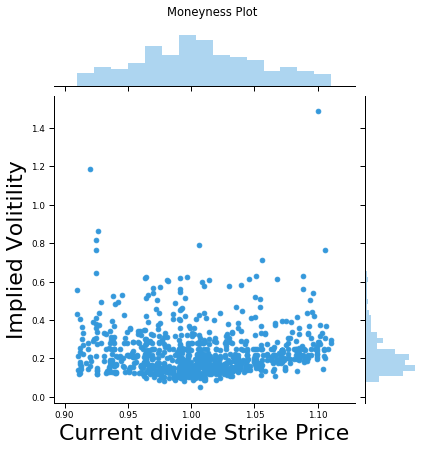

In [123]:
sns.jointplot(x=(df_european.Underlaying_asset_price / df_european.StrikePrice), 
              y=df_european.Implied_volatility, data=df_european, color='#3498db').set_axis_labels(
    'Current divide Strike Price', 'Implied Volitility')
plt.suptitle('Moneyness Plot')
plt.subplots_adjust(top=0.92)
plt.savefig('All_EU_Moneyness.tiff',format='tiff',dpi=600)

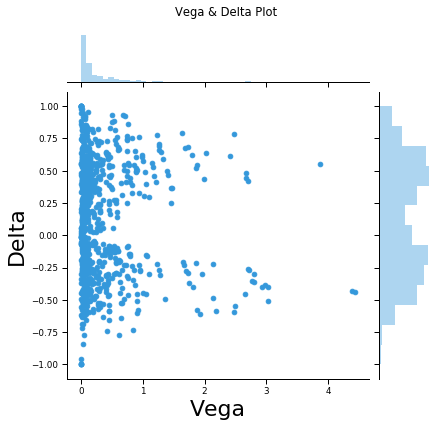

In [124]:
sns.jointplot(x=df_european.Vega, y=df_european.Delta, data=df_european, color='#3498db')
plt.suptitle('Vega & Delta Plot')
plt.subplots_adjust(top=0.92)
plt.savefig('Vega_Delta.tiff',format='tiff',dpi=600)

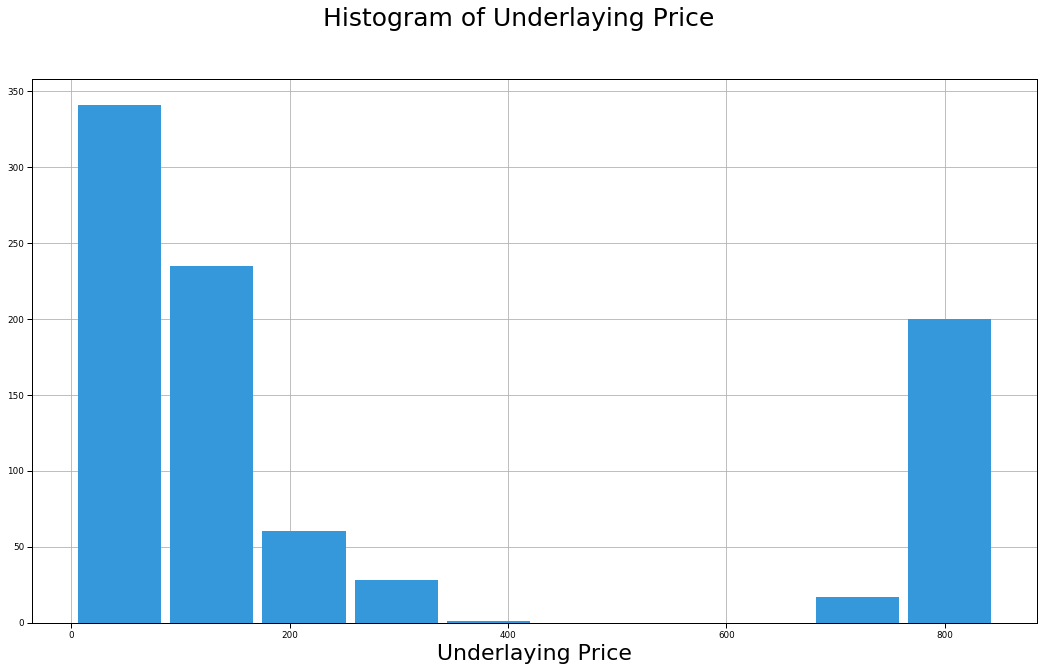

In [125]:
fig_underlaying = plt.figure(figsize=(18,10))
df_european.Underlaying_asset_price.hist(color='#3498db', zorder=2, rwidth=0.9)
plt.suptitle('Histogram of Underlaying Price', size = 25)
plt.xlabel('Underlaying Price')
plt.savefig('Underlaying_hist.tiff',format='tiff',dpi=600)
plt.show()

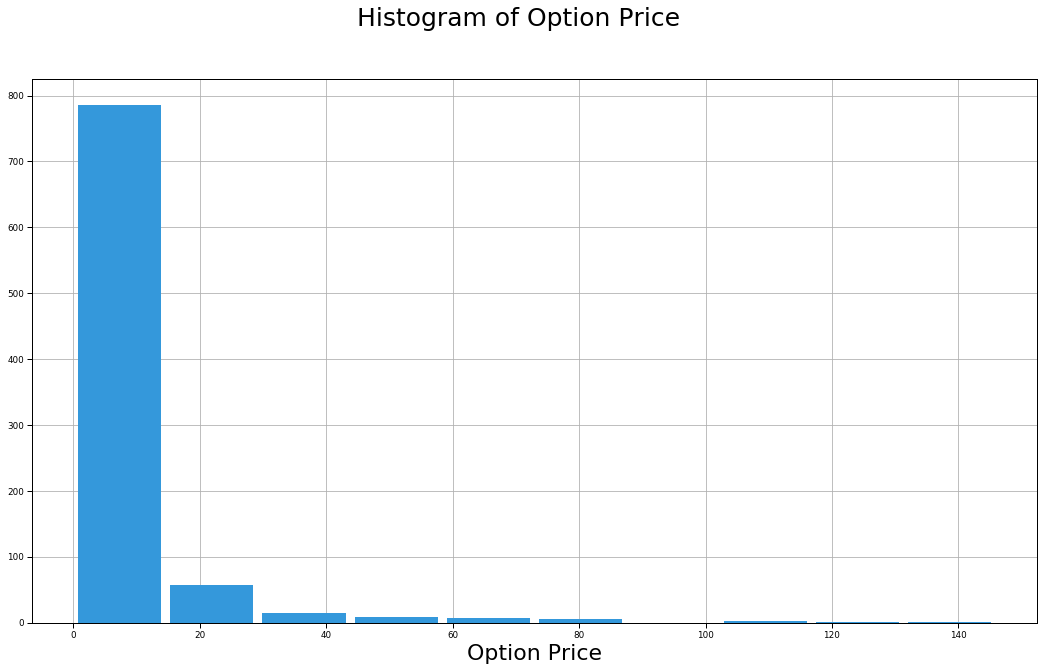

In [126]:
fig_option_price = plt.figure(figsize=(18,10))
df_european.Last.hist(color='#3498db', zorder=2, rwidth=0.9)
plt.suptitle('Histogram of Option Price', size = 25)
plt.xlabel('Option Price')
plt.savefig('Option_price_hist.tiff',format='tiff',dpi=600)
plt.show()

2. Compute Implied Volatility
 * Bisection Method

In [274]:
from sklearn.metrics import mean_squared_error as MSE

In [275]:
s = df_european.Underlaying_asset_price
k = df_european.StrikePrice
t = df_european.Expiration_Date
r = 0.03
o_p = df_european.Last
true_iv = df_european.Implied_volatility

In [276]:
def bsm_pricing(S, K, T, r, sigma, option_type):
    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    if option_type.strip().lower()=='call':
        N_d1 = stats.norm.cdf(d1, 0.0, 1.0)
        N_d2 = stats.norm.cdf(d2, 0.0, 1.0)
        call_price = (S * N_d1 - K * exp(-r * T) * N_d2)
        return call_price
        
    else:
        N_n_d2 = stats.norm.cdf(-d2, 0.0, 1.0)
        N_n_d1 = stats.norm.cdf(-d1, 0.0, 1.0)
        put_price = K * exp(-r * T) * N_n_d2 - S * N_n_d1
        return put_price

In [277]:
def bisection(fa, fb, a, b, S, K, T, r, option_type, o_p, eps):
    
    count = 0
    if fa * fb == 0:
        if fa == 0:
            return a, count
        else:
            return b, count
    if fa * fb > 0:
        return np.NaN,count
    while (fa * fb < 0):
        count += 1
        c = (a + b) / 2.0
        fc = (bsm_pricing(S, K, T, r, c, option_type) - o_p)
        if (fa * fc < 0):
            b = c
            fb = (bsm_pricing(S, K, T, r, b, option_type) - o_p)
        if (fc * fb < 0):
            a = c
            fa = (bsm_pricing(S, K, T, r, a, option_type)- o_p)
        if abs(fc) < eps:
            return c,count

def f(S, K, T, r, sigma, option_type, o_p):
    return bsm_pricing(S, K, T, r, sigma, option_type)- o_p

ans = []
i_bisect = 0
for i in range(len(df_european.index)):
    
    a = df_european.Implied_volatility.min() - 0.01
    b = df_european.Implied_volatility.max() + 0.01
    option_type= df_european.Type[i]
    
    fa = (bsm_pricing(s[i], k[i], t[i], r, a, option_type) - o_p[i])
    fb = (bsm_pricing(s[i], k[i], t[i], r, b, option_type) - o_p[i])
    
    c, count = bisection(fa, fb, a, b, s[i], k[i], t[i], r, option_type, o_p[i], eps = 1e-13)
    
    ans.append(c)
    i_bisect += count

df_european['bisect_iv'] = ans

In [278]:
bisect_mse = MSE(df_european.bisect_iv, df_european.Implied_volatility)
bisect_ave_i = i_bisect / len(df_european.index)
bisect_e = 1 / ((1 + bisect_mse) * log2(1 + bisect_ave_i))

print('MSE of Bisection method is ' + str(bisect_mse))
print('Average iterations of Bisection method is ' + str(bisect_ave_i))
print('Efficiency of Bisection method is ' + str(bisect_e))

MSE of Bisection method is 8.448049281281817e-06
Average iterations of Bisection method is 45.49092970521542
Efficiency of Bisection method is 0.18054047507583446


 * Brent Method

In [317]:
brent_list = []
i_brent = 0
for i in range(len(df_european.index)):
    
    def f(x):
        return bsm_pricing(s[i], k[i], t[i], r, x, option_type) - o_p[i]
    
    a = 1e-3
    b = 2.8
    option_type= df_european.Type[i]
    
    root, obj = optimize.brentq(f, a, b, full_output=True)
    
    brent_list.append(root)
    i_brent += obj.iterations

df_european['brent_iv'] = brent_list

In [318]:
brent_mse = MSE(df_european.brent_iv, df_european.Implied_volatility)
brent_ave_i = (i_brent_call + i_brent_put) / len(df_european.index)
brent_e = 1 / ((1 + brent_mse) * log2(1 + brent_ave_i))

print('MSE of Brent method is ' + str(brent_mse))
print('Average iterations of Brent method is ' + str(brent_ave_i))
print('Efficiency of Brent method is ' + str(brent_e))

MSE of Brent method is 8.448049281280286e-06
Average iterations of Brent method is 7.901360544217687
Efficiency of Brent method is 0.31705242603393474


 * Muller-Bisction Method

In [255]:
def sign(x):
    if x > 0:
        return 1.
    elif x < 0:
        return -1.
    elif x == 0:
        return 0.
    else:
        return x

def muller_bisect(fa,fb,a_,b_,S,K,T,r,o_p,eps):
    
    def f(x):
        return (bsm_pricing(S,K,T,r,x,option_type)- o_p)

    count = 0
    a = a_
    b = b_
    c= (a + b) / 2
    if fa * fb == 0:
        if fa == 0:
            return a, count
        else:
            return b, count
    if fa * fb > 0:
        return np.NaN, count  
    while f(a_)* f(b_) < 0:           
        count += 1
        if f(a) * f(c) < 0:
            a2 = a
            b2 = c
            
        if f(c) * f(b) < 0:
            a2 = c
            b2 = b          
        C=f(c)
        B=((a-c)**2*(f(b)-f(c))-(b-c)**2*(f(a)-f(c)))/((a-c)*(b-c)*(a-b))
        A=((b-c)*(f(a)-f(c))-(a-c)*(f(b)-f(c)))/((a-c)*(b-c)*(a-b))
        
        c2=c- (2*C)/(B+sign(B)*sqrt(B**2-4*A*C))   
        
        if f(a)*f(c)<0:
            c=b
        if f(c)*f(b)<0:
            c=a        
        if  (c2<=b2 and c2>=a2):
            c2=c2
        else:
            c2=(a2+b2)/2
        c=c2 
        a=a2
        b=b2
        if (f(c2)==0 or abs(f(c2))<eps):
            return c2,count

In [256]:
mb_list = []
i_mb = 0
for i in range(len(df_european.index)):
    
    a = df_european.Implied_volatility.min() - 0.01
    b = df_european.Implied_volatility.max() + 0.01
    option_type= df_european.Type[i]
    
    fa = (bsm_pricing(s[i], k[i], t[i], r, a, option_type) - o_p[i])
    fb = (bsm_pricing(s[i], k[i], t[i], r, b, option_type) - o_p[i])
    
    c, count = muller_bisect(fa, fb, a, b, s[i], k[i], t[i], r, o_p[i], eps = 1e-13)
    
    mb_list.append(c)
    i_mb += count

df_european['Muller_bisect_iv'] = mb_list

In [257]:
mb_mse = MSE(df_european.Muller_bisect_iv, df_european.Implied_volatility)
mb_ave_i = i_mb / len(df_european.index)
mb_e = 1 / ((1 + mb_mse) * log2(1 + mb_ave_i))

print('MSE of Muller Bisection method is ' + str(mb_mse))
print('Average iterations of Muller Bisection method is ' + str(mb_ave_i))
print('Efficiency of Muller Bisection method is ' + str(mb_e))

MSE of Muller Bisection method is 8.448049281282613e-06
Average iterations of Muller Bisection method is 5.68140589569161
Efficiency of Muller Bisection method is 0.36494021483922323


 * Newton Method

In [258]:
def bsm_vega(S, K, T, r, sigma):
    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

def f_newton(S, K, T, r, option_price, sigma, option_type):
    count = 0
    if abs(bsm_pricing(S, K, T, r, sigma, option_type)- option_price) < eps:
        return sigma, count
    else:
        while abs(bsm_pricing(S, K, T, r, sigma, option_type) - option_price) > eps:
            count += 1
            f1 = bsm_pricing(S, K, T, r, sigma, option_type) - option_price
            f_vega = bsm_vega(S, K, T, r, sigma)
            sigma_1 = sigma
            sigma -= (f1 / f_vega)
            if ( abs(bsm_pricing(S, K, T, r, sigma, option_type) - option_price) 
                < eps or abs(sigma - sigma_1) < eps):
                return sigma, count

In [259]:
i_newton = 0
df_european['newton_iv'] = 0
newton_list = []
eps = 1e-13

for i in range(len(df_european.index)):
    
    sigma = 0.5
    
    option_type = df_european.iloc[i]['Type']
    
    
    (est,count) = f_newton(s[i], k[i], t[i], r, o_p[i], sigma, option_type)
    newton_list.append(est)
    i_newton += count
df_european['newton_iv'] = newton_list

In [260]:
newton_mse = MSE(df_european.newton_iv, df_european.Implied_volatility)
newton_ave_i = i_newton/len(df_european.index)
newton_e = 1 / ((1 + newton_mse) * log2(1 + newton_ave_i))

print('MSE of Newton method is ' + str(newton_mse))
print('Average iterations of Newton method is ' + str(newton_ave_i))
print('Efficiency of Newton method is ' + str(newton_e))

MSE of Newton method is 8.448049281282876e-06
Average iterations of Newton method is 4.195011337868481
Efficiency of Newton method is 0.4206723473491455


 * New-Newton Method

In [286]:
df_european['new_newton_iv'] = 0
ans = []
a = -1
b = 5
i_new_newton = 0
eps = 1e-13

for i in range(len(df_european.index)):
    
    option_type = df_european.Type[i]
    
    sigma, obj = optimize.brentq(f, a, b, full_output=True)
    
    (est,count) = f_newton(s[i], k[i], t[i],r,o_p[i], sigma,option_type)
    ans.append(est)
    if count == 0:
        i_new_newton += obj.iterations
    else:
        i_new_newton += count
    
df_european['new_newton_iv'] = ans

In [287]:
new_newton_mse = MSE(df_european.new_newton_iv, df_european.Implied_volatility)
new_newton_ave_i = i_new_newton/len(df_european.index)
new_newton_e = 1 / ((1 + new_newton_mse) * log2(1 + new_newton_ave_i))

print('MSE of New-Newton method is ' + str(new_newton_mse))
print('Average iterations of New-Newton method is ' + str(new_newton_ave_i))
print('Efficiency of New-Newton method is ' + str(new_newton_e))

MSE of New-Newton method is 8.448049281281544e-06
Average iterations of New-Newton method is 5.816326530612245
Efficiency of New-Newton method is 0.36113887935556277


 * Halley Method

In [319]:
def bsm_vomma(S, K, T, r, sigma):
    d1= (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    vomma = bsm_vega(S, K, T, r, sigma) * (d1 * d2) / sigma
    return vomma

def f_halley(S, K, T, r, sigma, option_type, o_p):

    count=0
    
    if abs(bsm_pricing(S, K, T, r, sigma, option_type)- o_p) < eps:
        return sigma, count
    
    while abs(bsm_pricing(S, K, T, r, sigma, option_type)- o_p) > eps:
        count += 1
        vomma = bsm_vomma(S, K, T, r, sigma)
        vega = bsm_vega(S, K, T, r, sigma)
        
        sigma = sigma - (f(sigma) / vega) * (1 - (f(sigma) / vega) * (vomma / (2 * vega))) ** (-1)
        
        if abs(bsm_pricing(S, K, T, r, sigma, option_type)- o_p) < eps :
            return sigma, count

In [337]:
i_halley = 0
df_european['halley_iv'] = 0
ans = []
eps = 1e-12


for i in range(len(df_european.index)):
    
    sigma = 0.5
    
    option_type = df_european.Type[i]
    
    est, count = f_halley(s[i], k[i], t[i], r, sigma, option_type, o_p[i])
    ans.append(est)
    i_halley += count
    
df_european['halley_iv'] = ans

In [338]:
halley_mse = MSE(df_european.halley_iv, df_european.Implied_volatility)
halley_ave_i = i_halley/len(df_european.index)
halley_e = 1 / ((1 + halley_mse) * log2(1 + halley_ave_i))

print('MSE of Halley method is ' + str(halley_mse))
print('Average iterations of Halley method is ' + str(halley_ave_i))
print('Efficiency of Hally method is ' + str(halley_e))

MSE of Halley method is 8.448049281277114e-06
Average iterations of Halley method is 3.2346938775510203
Efficiency of Hally method is 0.4802439009394903


 * New-Halley Method

In [343]:
i_new_halley = 0
df_european['new_halley_iv'] = 0
ans = []
eps = 1e-12
a = 1e-3
b = 2.8

for i in range(len(df_european.index)):
        
    option_type = df_european.Type[i]
    
    sigma, obj = optimize.brentq(f, a, b, full_output=True)

    est, count = f_halley(s[i], k[i], t[i], r, sigma, option_type, o_p[i])
    ans.append(est)
    if count == 0:
        i_new_halley += obj.iterations
    else:
        i_new_halley += count
    
df_european['new_halley_iv'] = ans

In [344]:
new_halley_mse = MSE(df_european.new_halley_iv, df_european.Implied_volatility)
new_halley_ave_i = i_new_halley/len(df_european.index)
new_halley_e = 1 / ((1 + new_halley_mse) * log2(1 + new_halley_ave_i))

print('MSE of New-Halley method is ' + str(new_halley_mse))
print('Average iterations of New-Hally method is ' + str(new_halley_ave_i))
print('Efficiency of New-Hally method is ' + str(new_halley_e))

MSE of New-Halley method is 8.448049281282227e-06
Average iterations of New-Hally method is 8.865079365079366
Efficiency of New-Hally method is 0.30281387774875457


In [345]:
all_method_name = ['Bisection', 'Brent', 'Muller-Bisect', 'Newton', 'New-Newton',
                   'Halley', 'New-Halley']
all_mse = [bisect_mse, brent_mse, mb_mse, newton_mse, new_newton_mse, halley_mse, new_halley_mse]
all_ave_i = [bisect_ave_i, brent_ave_i, mb_ave_i, newton_ave_i, 
             new_newton_ave_i, halley_ave_i, new_halley_ave_i]
all_e = [bisect_e, brent_e, mb_e, newton_e, new_newton_e, halley_e, new_halley_e]

all_method_zip = list(zip(all_method_name, all_mse, all_ave_i, all_e))

df_all_method = pd.DataFrame(all_method_zip, columns=['Method', 'Mean_Error', 'Average_Steps', 'Efficiency'])


In [346]:
df_all_method

,Method,Mean_Error,Average_Steps,Efficiency
0,Bisection,0.000008,45.490930,0.180540
1,Brent,0.000008,7.901361,0.317052
2,Muller-Bisect,0.000008,5.681406,0.364940
3,Newton,0.000008,4.195011,0.420672
4,New-Newton,0.000008,5.816327,0.361139
5,Halley,0.000008,3.234694,0.480244
6,New-Halley,0.000008,8.865079,0.302814


In [347]:
import plotly.express as px
px.bar(df_all_method, x='Method', y='Mean_Error', color='Method')

In [348]:
px.bar(df_all_method, x='Method', y='Average_Steps', color='Method')

In [349]:
px.bar(df_all_method, x='Method', y='Efficiency', color='Method')